<a href="https://colab.research.google.com/github/ibader85/PredictiveAnalytics/blob/main/21_Ensemble_Trees_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

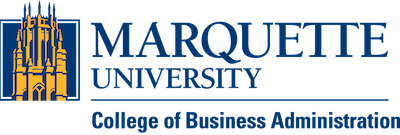

# BUAN 3065: Unlocking Business Insights with Predictive Analytics
# Ensemble Trees Using Python

Instructor: Dr. Badar Al Lawati

In this particular case, we split the data in the HELOC_Data
worksheet into two segments: 60% for training and 40% for test, and then apply the 10-fold cross-validation technique to identify bagging
ensemble tree with optimal hyperparameter settings.

In [1]:
# Import the dataset

import pandas as pd
myData = pd.read_excel('/content/HELOC.xlsx', sheet_name = 'HELOC_Data')
myData.head()

,Age,Sex,Income,HELOC
0,30,Female,101000,0
1,25,Male,86000,0
2,20,Male,50000,0
3,26,Male,58000,0
4,18,Female,93000,0


We use the Pandas get_dummies function
to convert the categorical Sex variable into a dummy variable.

Before performing dummy coding, we use the str.strip function to
remove leading and trailing whitespace from the Sex column to
ensure that there are no unwanted spaces around the values.

The
resulting dummy variable, Male, would have two possible values,
0 (female) and 1 (male).

We then use the Pandas concat function
to concatenate myData and the new dummy variable.

Finally, we
remove the original Sex column from the data frame as it is no
longer needed.

In [2]:
myData.Sex = myData.Sex.str.strip()
myData = pd.concat([myData, pd.get_dummies(myData.Sex, drop_first = True)], axis = 1)
myData = myData.drop('Sex', axis = 1)

We partition the data into 60% training and 40% test sets using
Scikit-Learn’s train_test_split function.

As usual, we set the
random_state to a fixed value, 321, to ensure that the data split
remains the same every time the code is executed.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(myData.drop('HELOC', axis = 1), myData.HELOC, test_size = 0.40, random_state = 321)

Use the len function to verify that there are 300 cases in the
training data set and 200 cases in the test data set

In [4]:
len(X_train)

300

In [5]:
len(X_train)

300

The key difference between the bagging
and random forest strategies is the number of predictor variables
used in the week tree models.

Therefore, we can use the
RandomForestClassifier class for creating both models by setting
the number of variables differently.

We import the
RandomForestClassifier class and create a variable of the classifier
named Bagging_model.

We set the random seed for the random
number generator used by the decision tree algorithm to 321 to
ensure that the results are reproducible

In [6]:
from sklearn.ensemble import RandomForestClassifier
Bagging_model = RandomForestClassifier(random_state = 321)

To optimize our model, we use the cross-validation approach for
hyperparameter tuning.

We set up our parameter grid to tune the
n_estimator parameter to control the number of trees.

The range
for the number of trees is set to include 100, 250, 500, and 1000
trees.

We also tune the max_depth parameter to 1 to 10 to control
the depth of the weak trees.

Because the bagging classifier uses all
the features (predictor variables) for each weak tree model, we set
the max_features to None, which means including all features in each weak tree model

In [7]:
paramGrid = {'n_estimators': [100, 250, 500, 1000], 'max_depth': range(1, 10 + 1), 'max_features': [None]}

We then import the Scikit-Learn’s GridSearchCV class and create
a variable of the class named search with five options.

The first
two options are used to specify our model and paramGrid.

The cv
= 10 option specifies that we will use the 10-fold cross-validation
method. The scoring = “accuracy” option chooses accuracy as the
scoring metric for comparing candidate classification tree models.


The last option, n_jobs = −1, means that all available CPU cores
will be used for running the models in parallel to speed up the
grid search process

In [9]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(Bagging_model, paramGrid, cv = 10, scoring = 'accuracy', n_jobs = -1)

We use the fit function to train the bagging tree model, search,
using the training data set and save the result in Bagging_tree.

We
then view the results in a data frame using the cv_results_
attribute of Bagging_tree. To make the results clearer, we sort the
output based on accuracy ranking (stored in the rank_test_score
column) using the sort_values function and only display the most
relevant results for the top 10 models

In [11]:
Bagging_tree = search.fit(X_train, y_train)
pd.DataFrame(Bagging_tree.cv_results_).sort_values('rank_test_score')[['param_n_estimators', 'param_max_depth', 'mean_test_score', 'rank_test_score']].head(10)

,param_n_estimators,param_max_depth,mean_test_score,rank_test_score
10,500,3,0.820000,1
9,250,3,0.820000,1
17,250,5,0.820000,1
16,100,5,0.820000,1
19,1000,5,0.820000,1
18,500,5,0.816667,6
11,1000,3,0.816667,6
8,100,3,0.813333,8
12,100,4,0.813333,8
15,1000,4,0.810000,10


Python
would choose the simplest model among the five as the best
bagging tree model.

We can use the best_estimator_ attribute to
find out which one that is

In [12]:
Bagging_tree.best_estimator_

RandomForestClassifier(max_depth=3, max_features=None, n_estimators=250,
                       random_state=321)

Although ensemble tree models do not provide the tree diagram,
we can display the feature importance information to get some
insights about the model.

We first create a Pandas DataFrame of
the features from the training data and the feature importance
measures extracted from the best model, which can be obtained
from the feature_importances_ attribute.

We then generate a bar
plot that sorts the importance measures in a descending order.

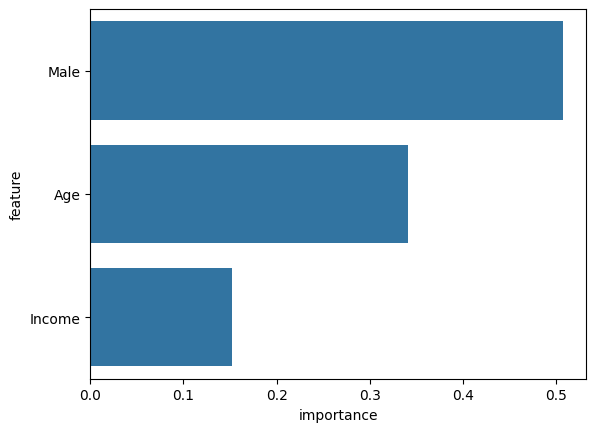

In [13]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': Bagging_tree.best_estimator_.feature_importances_})

import seaborn as sns
sns.barplot(y = 'feature', x = 'importance', data = importances.sort_values('importance', ascending = False));

The performance assessment process for the bagging tree model
is similar to any other classification models (e.g., KNN, naïve
Bayes, and classification tree); therefore, we will be brief in our
explanation of the following code

To assess the performance of the bagging tree model on an
unseen data set, we apply the pruned tree to the test data set and
create a confusion matrix

In [14]:
testPredictions = Bagging_tree.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, testPredictions)

array([[133,  14],
       [ 25,  28]])

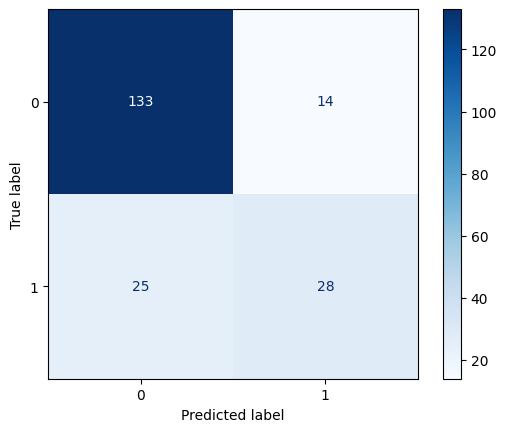

In [15]:
# Alternatively, we can create a confusion matrix with better visualization as follows

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(Bagging_tree, X_test, y_test, cmap = plt.cm.Blues);

We obtain the common performance measures using Scikit-
Learn’s classification_report function and specify the label for the
target class (Class 1) to be “Will Respond” and the label for the
nontarget class (Class 0) to be “Will Not Respond”.

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, testPredictions, target_names = ['Will Not Respond', 'Will Respond'], digits = 4))

                  precision    recall  f1-score   support

Will Not Respond     0.8418    0.9048    0.8721       147
    Will Respond     0.6667    0.5283    0.5895        53

        accuracy                         0.8050       200
       macro avg     0.7542    0.7165    0.7308       200
    weighted avg     0.7954    0.8050    0.7972       200



Note
that for a binary classification problem such as this one,
sensitivity is represented by recall for the target class, specificity is
represented by recall for the nontarget class, and the overall
accuracy is represented by the weighted average for recall.

Therefore, the sensitivity, specificity, and overall accuracy of our
classification tree model are 0.5283, 0.9048, and 0.8050
respectively. When asked to report precision, we usually only
report the precision for the target class, and in this case, 0.6667.

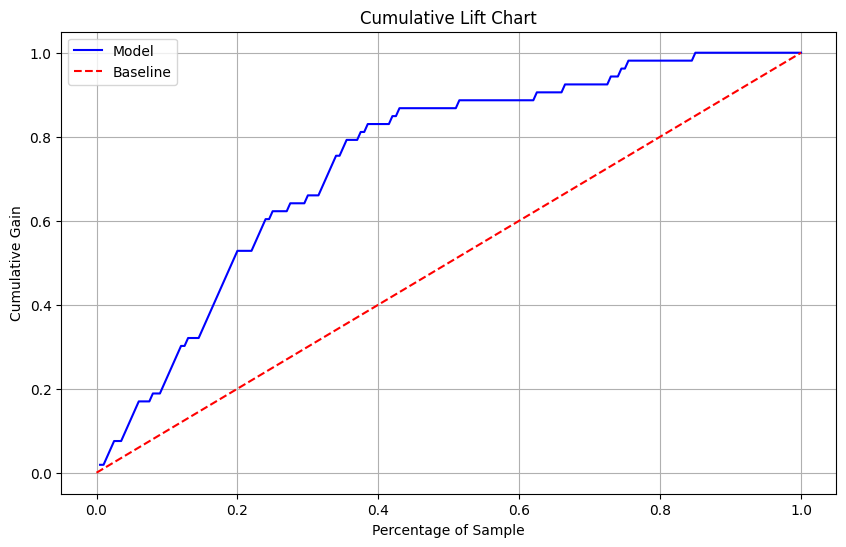

In [23]:
# Compute the predicted probabilities for the positive class
testPredictionProbs = Bagging_tree.predict_proba(X_test)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # <- Make sure pandas is imported!

# Create a DataFrame of actuals and predicted probabilities
testOutcomes = pd.DataFrame({
    'Actuals': y_test,
    'Probs': testPredictionProbs[:, 1]
})

# Sort cases by predicted probability (descending)
data = testOutcomes.sort_values(by='Probs', ascending=False).reset_index(drop=True)

# Compute cumulative positives
data['cumulative_positives'] = data['Actuals'].cumsum()

# Total number of actual positives
total_positives = data['Actuals'].sum()

# Compute cumulative gain
data['cumulative_gain'] = data['cumulative_positives'] / total_positives

# Compute percentage of population
data['percentage_population'] = np.arange(1, len(data) + 1) / len(data)

# Plot cumulative gain chart
plt.figure(figsize=(10, 6))
plt.plot(data['percentage_population'], data['cumulative_gain'], label='Model', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline', color='red')
plt.title('Cumulative Lift Chart')
plt.xlabel('Percentage of Sample')
plt.ylabel('Cumulative Gain')
plt.legend()
plt.grid()
plt.show()

To create the decile-wise lift chart, we first build a cumulative gains table and then create the decile-wise lift chart to visualize the information from the cumulative gains table using Seaborn's barplot function.

/tmp/ipython-input-2170612334.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lifts = (testOutcomes.groupby(cuts)['Actuals'].sum() / cuts.value_counts()) / np.mean(testOutcomes['Actuals'])


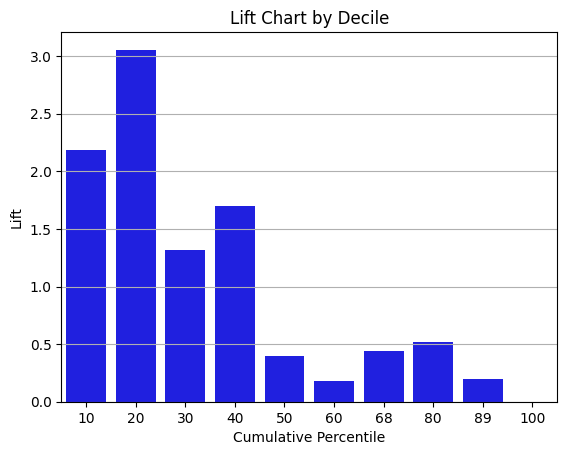

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with actuals and predicted probabilities
testOutcomes = pd.DataFrame({
    'Actuals': y_test,
    'Probs': testPredictionProbs[:, 1]
})

# Divide probabilities into 10 quantile-based bins (deciles)
cuts = pd.qcut(testOutcomes['Probs'], q=10, duplicates='drop')

# Calculate lift per decile:
# (Mean response in decile / overall mean response)
lifts = (testOutcomes.groupby(cuts)['Actuals'].sum() / cuts.value_counts()) / np.mean(testOutcomes['Actuals'])

# Build a new dataframe for plotting
plotDat = pd.DataFrame({
    'Lift': np.round(lifts, 3),
    'N': cuts.value_counts()
})

# Calculate cumulative number of observations
plotDat['Cumulative N'] = np.cumsum(np.flip(plotDat['N']))

# Calculate cumulative percentile
plotDat['Cumulative Percentile'] = round(plotDat['Cumulative N'] / len(testOutcomes) * 100, 0).astype(int)

# Sort by cumulative percentile (for plotting left-to-right)
plotDat = plotDat.sort_values(by='Cumulative Percentile')

# Create lift chart
sns.barplot(y='Lift', x='Cumulative Percentile', data=plotDat, color='blue')
plt.title("Lift Chart by Decile")
plt.xlabel("Cumulative Percentile")
plt.ylabel("Lift")
plt.grid(axis='y')
plt.show()

The chart shows that the classification tree model is effective in predicting which bank customers are likely to respond to the HELOC offer, indicated by the high lift values (2.185 and 3.055 for the first and second leftmost bars according to the cumulative gains table) for the first couple of bars.

Now, create a receiver operating characteristic (ROC) curve for the model using Scikit-Learn's RocCurveDisplay

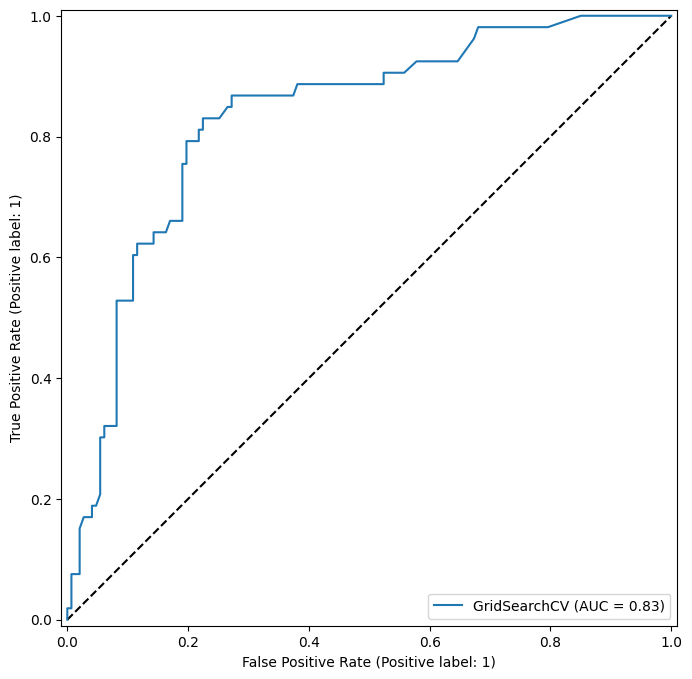

In [32]:
from sklearn.metrics import RocCurveDisplay
fig,ax = plt.subplots(figsize = (8, 8))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls ='--', c = 'k')
RocCurveDisplay.from_estimator(Bagging_tree, X = X_test, y = y_test, ax = ax);

The bagging tree model performs substantially better than the baseline model (shown as the dashed diagonal line) in terms of both sensitivity and specificity across all cutoff values.

The area under the ROC curve, or AUC, is high (0.83). Alternatively, we can use the Scikit-Learn's roc_auc_score function with the actual class memberships (y_test) and the predicted probabilities of belonging to the target class (testPredictionProbs) to compute the AUC value.

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, testPredictionProbs[:, 1])

# AUC value with more fractional digits (0.8317289179822873)

np.float64(0.8317289179822873)

Finally, we fit the model to the novel data in the HELOC_Score worksheet.

We first import the data from the HELOC_Score worksheet of the HELOC data file into a Pandas DataFrame and name it myScoreData.

We then convert the Sex column using the same approach as in step b and save the final data in myScoreData_dummied.

Finally, we use the predict function to apply our model, Bagging_tree, for scoring the new records.

We store the values in Bagging_Scores and Bagging_Probs, representing both class membership and probabilities.

In [42]:
myScoreData = pd.read_excel('/content/HELOC.xlsx' , sheet_name = 'HELOC_Score')
myScoreData.Sex = myScoreData.Sex.str.strip()
myScoreData_dummied = pd.concat([myScoreData, pd.get_dummies(myScoreData.Sex, drop_first = True)], axis = 1)
myScoreData_dummied = myScoreData_dummied.drop('Sex', axis = 1)

In [43]:
Bagging_Scores = Bagging_tree.predict(myScoreData_dummied)
Bagging_Probs = Bagging_tree.predict_proba(myScoreData_dummied)

Once scoring is finished, we add these results to our existing myScoreData as new columns and view the first and last few results using the head and tail functions.

In [44]:
myScoreData['Prediction: HELOC'] = CT_Scores
myScoreData['Prob: 0'] = Bagging_Probs[:, 0]
myScoreData['Prob: 1'] = Bagging_Probs[:, 1]
myScoreData.head()


NameError: name 'CT_Scores' is not defined

In [45]:
myScoreData.tail()

,Age,Sex,Income
15,40,Female,118000
16,38,Male,153000
17,63,Male,156000
18,51,Female,172000
19,51,Male,43000
